# 06. 범주형과 수치형 자료

## 1. 범주형 자료 분석

In [1]:
# 패키지 설치 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [3]:
# 테마 설정 및 한글 인식
sns.set_theme(style = "darkgrid")
plt.rc('font', family = 'NanumGothic')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스(-) 인식

### 1.1 데이터 확인

In [4]:
# 데이터 불러오기 및 데이터 프레임으로 저장
eda_df = pd.read_csv('./data/01_1.EDA.csv', encoding='cp949')
eda_df.head(10)

,id,성별,분반,학년,몸무게,출석,중간,기말
0,1,남자,1,1,40,100,87,80
1,2,여자,2,2,50,100,83,60
2,3,남자,1,3,56,100,84,60
3,4,여자,2,4,51,100,73,60
4,5,남자,1,1,55,100,68,60
5,6,남자,2,2,61,100,77,50
6,7,여자,1,3,69,100,40,80
7,8,여자,2,2,44,100,73,30
8,9,여자,1,2,66,80,64,40
9,10,남자,2,2,60,100,66,40


In [5]:
# 데이터 구조 살펴보기 
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      102 non-null    int64 
 1   성별      102 non-null    object
 2   분반      102 non-null    int64 
 3   학년      102 non-null    int64 
 4   몸무게     102 non-null    int64 
 5   출석      102 non-null    int64 
 6   중간      102 non-null    int64 
 7   기말      102 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 6.5+ KB


In [6]:
eda_df.shape

(102, 8)

In [7]:
eda_df.dtypes

id      int64
성별     object
분반      int64
학년      int64
몸무게     int64
출석      int64
중간      int64
기말      int64
dtype: object

In [9]:
#범주형 변수 처리(문자로 처리)

eda_df['분반'].replace({1:'A반', 2:'B반'}, inplace=True)
eda_df['학년'].replace({1:'1학년', 2:'2학년', 3:'3학년', 4:'4학년'}, inplace=True)

eda_df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_20836\391659871.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  eda_df['분반'].replace({1:'A반', 2:'B반'}, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_20836\391659871.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

,id,성별,분반,학년,몸무게,출석,중간,기말
0,1,남자,A반,1학년,40,100,87,80
1,2,여자,B반,2학년,50,100,83,60
2,3,남자,A반,3학년,56,100,84,60
3,4,여자,B반,4학년,51,100,73,60
4,5,남자,A반,1학년,55,100,68,60


In [11]:
# datatype을 category 변경
eda_df['성별'] = eda_df['성별'].astype('category')
eda_df['분반'] = eda_df['분반'].astype('category')
eda_df['학년'] = eda_df['학년'].astype('category')

eda_df.dtypes


id        int64
성별     category
분반     category
학년     category
몸무게       int64
출석        int64
중간        int64
기말        int64
dtype: object

### 1.2 범주형 변수(1개)

### 1) 도수분포표

In [13]:
#value_counts()

eda_df['성별'].value_counts()

성별
남자    54
여자    48
Name: count, dtype: int64

In [14]:
freq_table = pd.DataFrame(eda_df['성별'].value_counts())
freq_table.columns = ['count']
freq_table

,count
성별,
남자,54
여자,48


In [15]:
# crosstab 이용
freq_table1 = pd.crosstab(index = eda_df['성별'],
                          columns= ['count'])
freq_table1


col_0,count
성별,
남자,54
여자,48


In [17]:
# 비율 추가
freq_table1['prop'] = np.round(freq_table1['count']/sum(freq_table1['count']), 2)
freq_table1

col_0,count,prop
성별,,
남자,54,0.53
여자,48,0.47


In [18]:
#누적 비율
freq_table1['cum_prop'] = np.cumsum(freq_table1['prop'])
freq_table1

col_0,count,prop,cum_prop
성별,,,
남자,54,0.53,0.53
여자,48,0.47,1.00


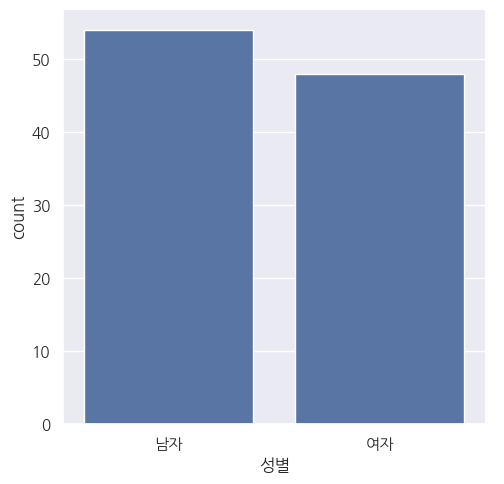

In [19]:
# 막대그래프 
sns.catplot(x = '성별',
            kind = 'count',
            data = eda_df)

plt.show()

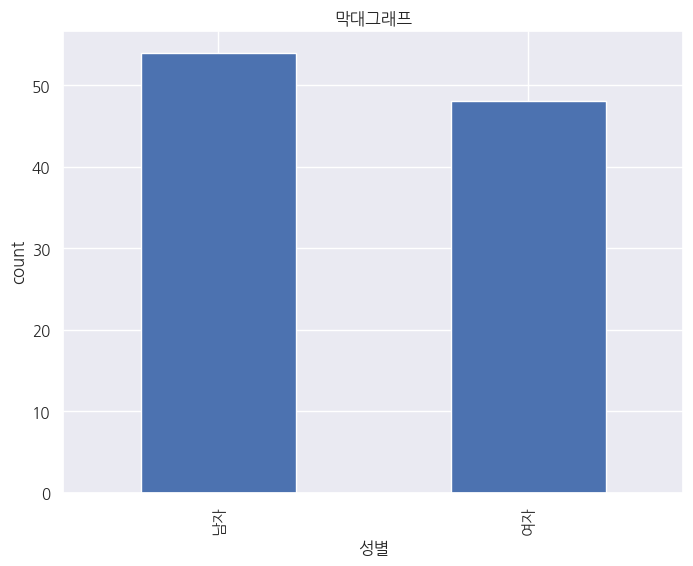

In [20]:
# 막대그래프 (pd_plot)
ax = freq_table1['count'].plot(figsize=(8,6),
                               kind = 'bar')
ax.set(title = '막대그래프',
       xlabel = '성별',
       ylabel = 'count')
plt.show()

### 1.3 범주형 변수(2개)

### 1) 분할표(cross-tablation)

In [23]:
# 두 변수 모두 범주형일때
cross_table = pd.crosstab(index = eda_df['성별'],
                          columns = eda_df['분반'],
                          margins=True)
cross_table

분반,A반,B반,All
성별,,,
남자,21,33,54
여자,31,17,48
All,52,50,102


In [24]:
# 정리
cross_table.index = ['남성', '여성', '열전체']
cross_table.columns = ['A반', 'B반', '행전체']

cross_table

,A반,B반,행전체
남성,21,33,54
여성,31,17,48
열전체,52,50,102


In [25]:
#전체비율

cross_table/cross_table.loc["열전체", "행전체"]


,A반,B반,행전체
남성,0.205882,0.323529,0.529412
여성,0.303922,0.166667,0.470588
열전체,0.509804,0.490196,1.000000


In [26]:
#열비율
cross_table/cross_table.loc["열전체"]


,A반,B반,행전체
남성,0.403846,0.66,0.529412
여성,0.596154,0.34,0.470588
열전체,1.000000,1.00,1.000000


In [27]:
cross_table.div(cross_table["행전체"], axis = 0)

,A반,B반,행전체
남성,0.388889,0.611111,1.0
여성,0.645833,0.354167,1.0
열전체,0.509804,0.490196,1.0


In [28]:
#전체비율 저장
cross_prop = cross_table/cross_table.loc["열전체", "행전체"]
cross_prop

,A반,B반,행전체
남성,0.205882,0.323529,0.529412
여성,0.303922,0.166667,0.470588
열전체,0.509804,0.490196,1.000000


### 2) 그래프 그리기

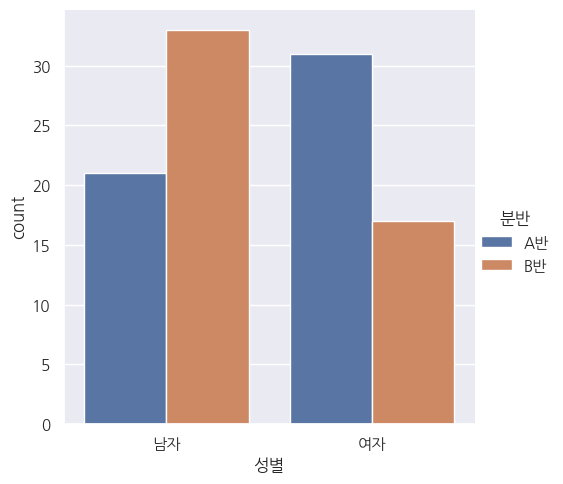

In [29]:
#누적막대그래프(count)
sns.catplot(x = '성별',
            hue = '분반',
            kind = 'count',
            data = eda_df)

plt.show()